In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(10, 8)})

from neuron import LIF
from stdp import STDP

In [2]:
import math


I_constant = lambda x: 4
I_step = lambda x: 5.5 if int(x / 20) % 2 == 0 else 0
I_sin = lambda x: 3 * (math.sin((x) / 3)) + 3.25
I_linear = lambda x: 0.04 * x + 4
I_x2 = lambda x: pow(x - 50, 2) *0.004

## Experiment 1
* Neuron 1: constant input current (I = 4) 
* Neuron 2: sine input current 
* Neuron 3: step function input current 

In [3]:
neurons = [LIF(I=I_constant), LIF(I=I_sin), LIF(I=I_step)]
connection_matrix = [
    [0, 5, 0],
    [0, 0, 5],
    [5, 0, 0],
    ]
stdp = STDP(neurons, connection_matrix)
stdp.execute(100)

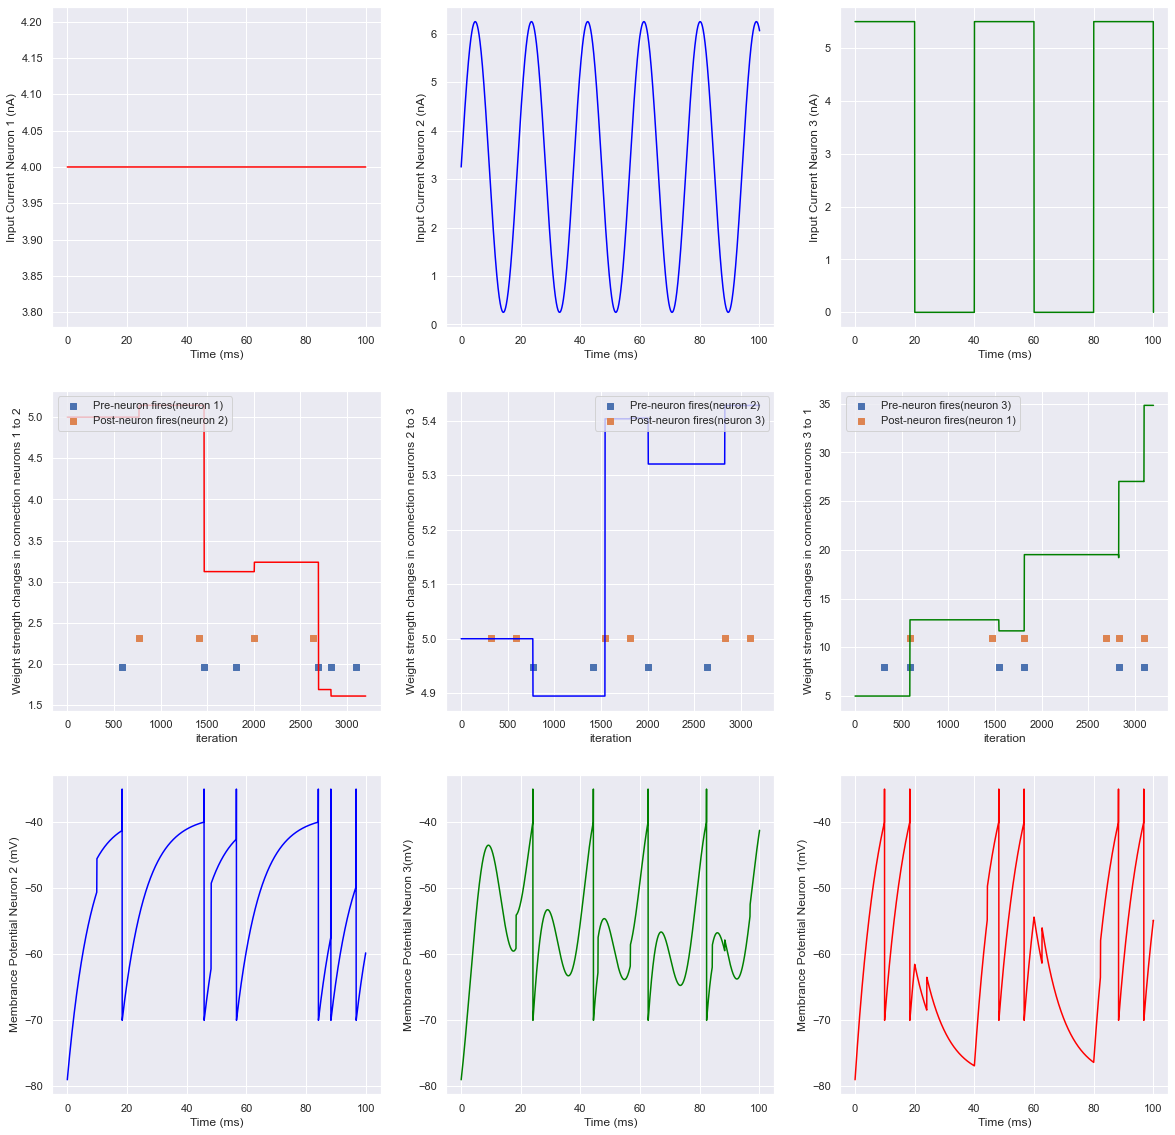

In [4]:
neuron1 = neurons[0]
neuron2 = neurons[1]
neuron3 = neurons[2]

plt.figure(figsize=(20, 20))
dt = 0.03125

plt.subplot(3, 3, 1)
plt.plot(list(map(lambda x: x * dt, range(len(neuron1.u)))),
         list(map(neuron1.I, list(map(lambda x: x * dt, range(len(neuron1.u)))))),
         color='red')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 1 (nA)')

plt.subplot(3, 3, 2)
plt.plot(list(map(lambda x: x * dt, range(len(neuron2.u)))),
         list(map(neuron2.I, list(map(lambda x: x * dt, range(len(neuron2.u)))))),
         color='blue')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 2 (nA)')

plt.subplot(3, 3, 3)
plt.plot(list(map(lambda x: x * dt, range(len(neuron3.u)))),
         list(map(neuron3.I, list(map(lambda x: x * dt, range(len(neuron3.u)))))),
         color='green')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 3 (nA)')

plt.subplot(3, 3, 4)
history = neuron1.connections[0].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="red")
plt.scatter(neuron1.fires, [minn + range_term * 0.1] * (len(neuron1.fires)), label='Pre-neuron fires(neuron 1)', marker='s')
plt.scatter(neuron2.fires, [minn + range_term * 0.2] * (len(neuron2.fires)), label='Post-neuron fires(neuron 2)', marker='s')
plt.gca().legend(loc='upper left')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 1 to 2')

plt.subplot(3, 3, 5)
history = neuron2.connections[1].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="blue")
plt.scatter(neuron2.fires, [minn + range_term * 0.1] * (len(neuron2.fires)), label='Pre-neuron fires(neuron 2)', marker='s')
plt.scatter(neuron3.fires, [minn + range_term * 0.2] * (len(neuron3.fires)), label='Post-neuron fires(neuron 3)', marker='s')
plt.gca().legend(loc='upper right')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 2 to 3')

plt.subplot(3, 3, 6)
history = neuron3.connections[1].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="green")
plt.scatter(neuron3.fires, [minn + range_term * 0.1] * (len(neuron3.fires)), label='Pre-neuron fires(neuron 3)', marker='s')
plt.scatter(neuron1.fires, [minn + range_term * 0.2] * (len(neuron1.fires)), label='Post-neuron fires(neuron 1)', marker='s')
plt.gca().legend(loc='best')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 3 to 1')

plt.subplot(3, 3, 7)
plt.plot(list(map(lambda x: dt * x, range(len(neuron2.u)))), neuron1.u, color="blue")
plt.gca().set_ylabel('Membrance Potential Neuron 2 (mV)')
plt.gca().set_xlabel('Time (ms)')

plt.subplot(3, 3, 8)
plt.plot(list(map(lambda x: dt * x, range(len(neuron3.u)))), neuron2.u, color="green")
plt.gca().set_ylabel('Membrance Potential Neuron 3(mV)')
plt.gca().set_xlabel('Time (ms)')

plt.subplot(3, 3, 9)
plt.plot(list(map(lambda x: dt * x, range(len(neuron1.u)))), neuron3.u, color="red")
plt.gca().set_ylabel('Membrance Potential Neuron 1(mV)')
plt.gca().set_xlabel('Time (ms)')

plt.show()

In [5]:
delta_w_history1 = neuron1.connections[0].delta_w_history + neuron2.connections[1].delta_w_history + neuron3.connections[1].delta_w_history

## Experiment 2
* Neuron 1: constant input current (I = 4) 
* Neuron 2: constant input current (I = 5) 
* Neuron 3: constant input current (I = 6) 

In [6]:
neurons = [LIF(I=I_constant), LIF(I=lambda x: 5), LIF(I=lambda x: 6)]
connection_matrix = [
    [0, 5, 0],
    [0, 0, 5],
    [5, 0, 0],
    ]
stdp = STDP(neurons, connection_matrix)
stdp.execute(100)

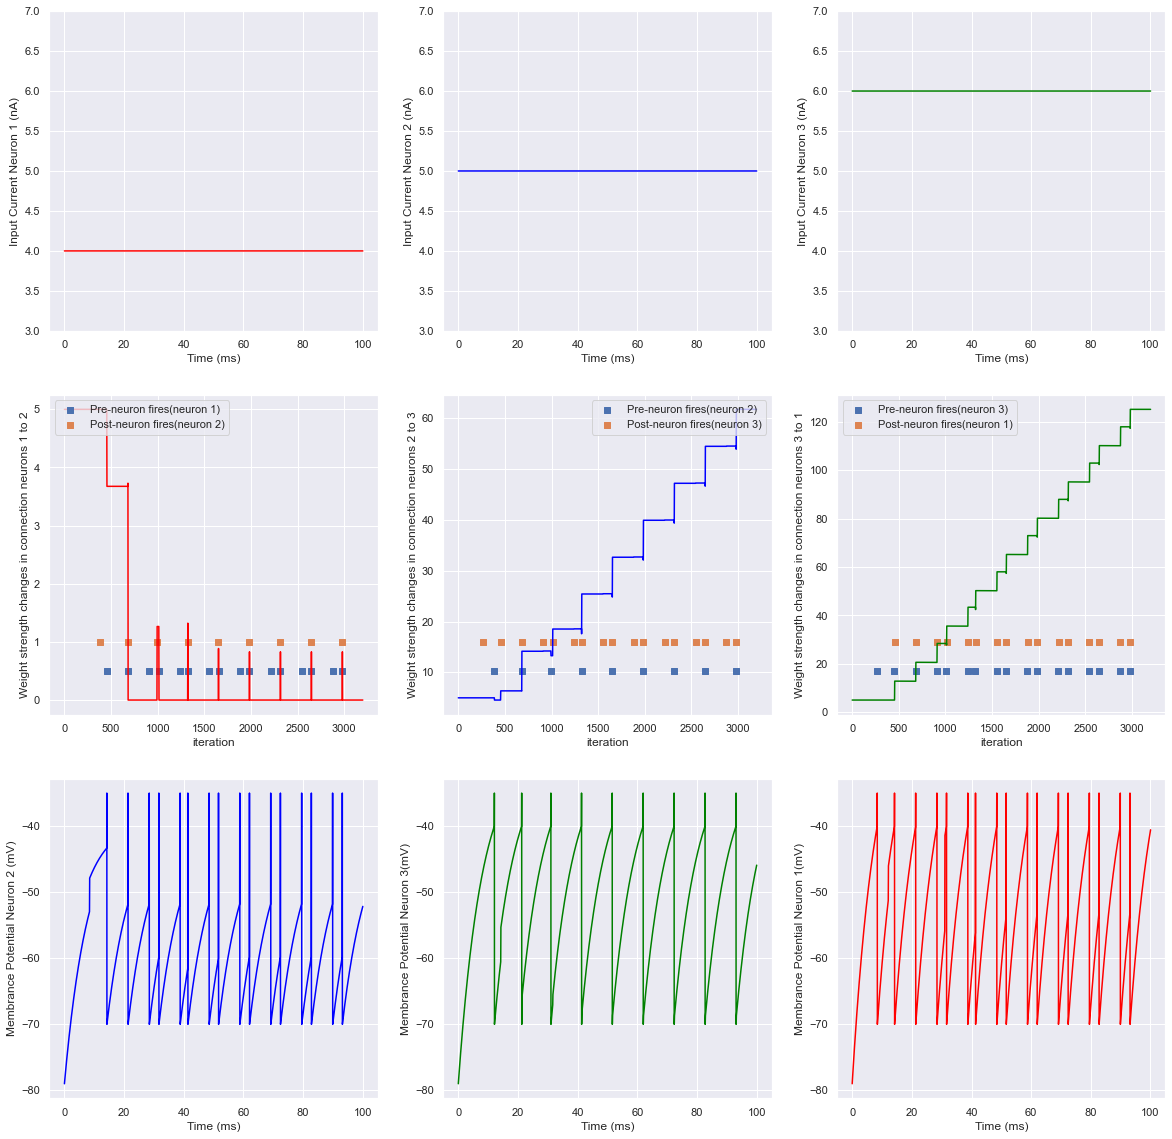

In [7]:
neuron1 = neurons[0]
neuron2 = neurons[1]
neuron3 = neurons[2]

plt.figure(figsize=(20, 20))
dt = 0.03125

plt.subplot(3, 3, 1)
plt.plot(list(map(lambda x: x * dt, range(len(neuron1.u)))),
         list(map(neuron1.I, list(map(lambda x: x * dt, range(len(neuron1.u)))))),
         color='red')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 1 (nA)')
plt.gca().set_ylim([3, 7])

plt.subplot(3, 3, 2)
plt.plot(list(map(lambda x: x * dt, range(len(neuron2.u)))),
         list(map(neuron2.I, list(map(lambda x: x * dt, range(len(neuron2.u)))))),
         color='blue')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 2 (nA)')
plt.gca().set_ylim([3, 7])


plt.subplot(3, 3, 3)
plt.plot(list(map(lambda x: x * dt, range(len(neuron3.u)))),
         list(map(neuron3.I, list(map(lambda x: x * dt, range(len(neuron3.u)))))),
         color='green')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 3 (nA)')
plt.gca().set_ylim([3, 7])


plt.subplot(3, 3, 4)
history = neuron1.connections[0].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="red")
plt.scatter(neuron1.fires, [minn + range_term * 0.1] * (len(neuron1.fires)), label='Pre-neuron fires(neuron 1)', marker='s')
plt.scatter(neuron2.fires, [minn + range_term * 0.2] * (len(neuron2.fires)), label='Post-neuron fires(neuron 2)', marker='s')
plt.gca().legend(loc='upper left')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 1 to 2')

plt.subplot(3, 3, 5)
history = neuron2.connections[1].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="blue")
plt.scatter(neuron2.fires, [minn + range_term * 0.1] * (len(neuron2.fires)), label='Pre-neuron fires(neuron 2)', marker='s')
plt.scatter(neuron3.fires, [minn + range_term * 0.2] * (len(neuron3.fires)), label='Post-neuron fires(neuron 3)', marker='s')
plt.gca().legend(loc='upper right')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 2 to 3')

plt.subplot(3, 3, 6)
history = neuron3.connections[1].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="green")
plt.scatter(neuron3.fires, [minn + range_term * 0.1] * (len(neuron3.fires)), label='Pre-neuron fires(neuron 3)', marker='s')
plt.scatter(neuron1.fires, [minn + range_term * 0.2] * (len(neuron1.fires)), label='Post-neuron fires(neuron 1)', marker='s')
plt.gca().legend(loc='best')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 3 to 1')

plt.subplot(3, 3, 7)
plt.plot(list(map(lambda x: dt * x, range(len(neuron2.u)))), neuron1.u, color="blue")
plt.gca().set_ylabel('Membrance Potential Neuron 2 (mV)')
plt.gca().set_xlabel('Time (ms)')

plt.subplot(3, 3, 8)
plt.plot(list(map(lambda x: dt * x, range(len(neuron3.u)))), neuron2.u, color="green")
plt.gca().set_ylabel('Membrance Potential Neuron 3(mV)')
plt.gca().set_xlabel('Time (ms)')

plt.subplot(3, 3, 9)
plt.plot(list(map(lambda x: dt * x, range(len(neuron1.u)))), neuron3.u, color="red")
plt.gca().set_ylabel('Membrance Potential Neuron 1(mV)')
plt.gca().set_xlabel('Time (ms)')

plt.show()

In [8]:
delta_w_history2 = neuron1.connections[0].delta_w_history + neuron2.connections[1].delta_w_history + neuron3.connections[1].delta_w_history

## Experiment 3
* Neuron 1: constant input current (I = 4) 
* Neuron 2: constant input current (I = 5) 
* Neuron 3: sine input current

In [9]:
neurons = [LIF(I=I_constant), LIF(I=lambda x: 5), LIF(I=I_sin)]
connection_matrix = [
    [0, 5, 0],
    [0, 0, 5],
    [5, 0, 0],
    ]
stdp = STDP(neurons, connection_matrix)
stdp.execute(100)

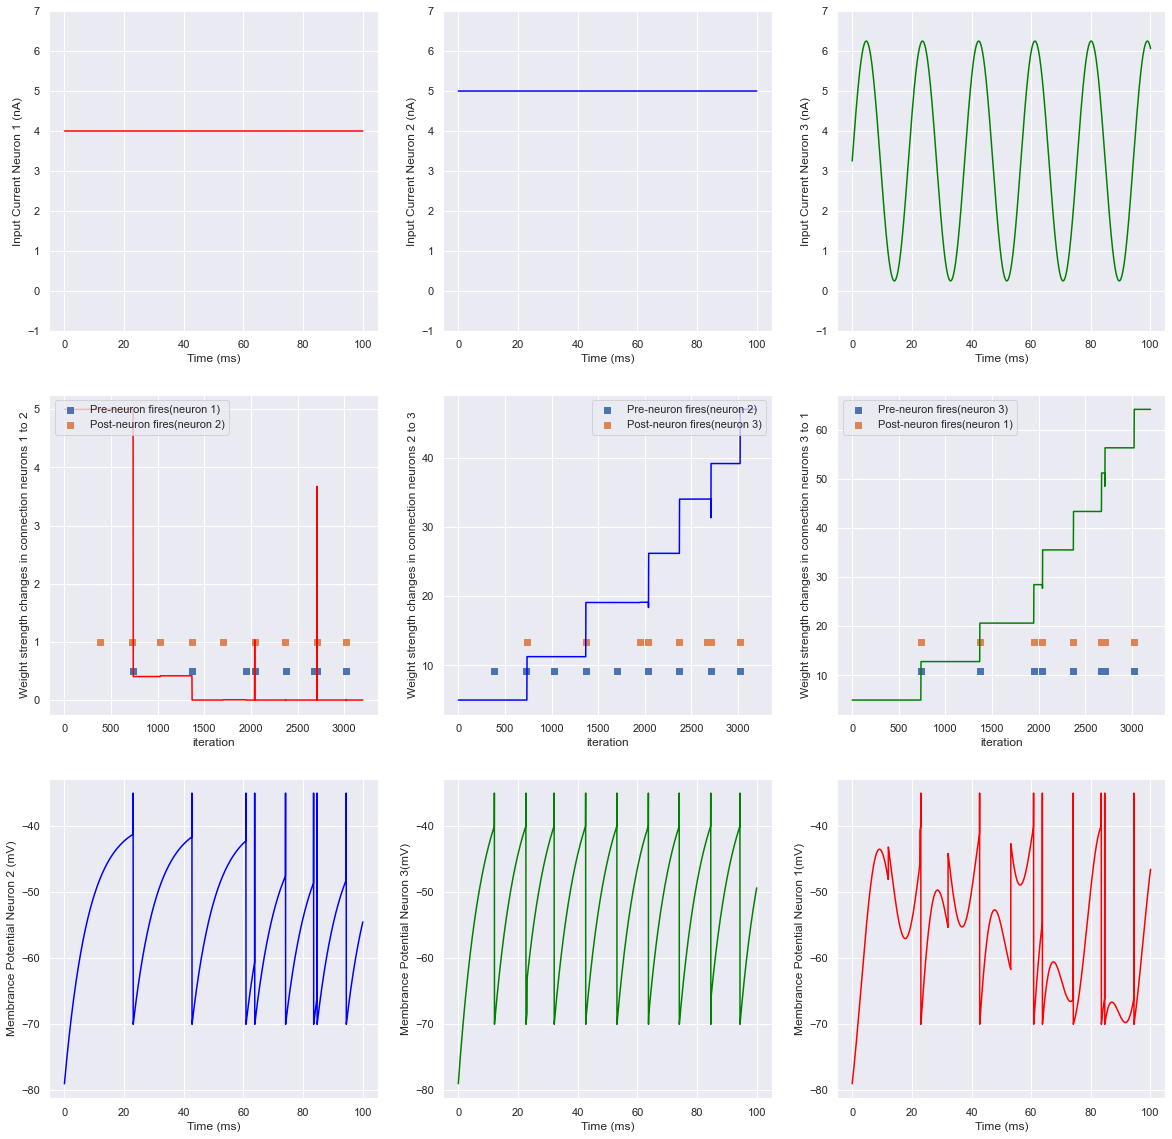

In [10]:
neuron1 = neurons[0]
neuron2 = neurons[1]
neuron3 = neurons[2]

plt.figure(figsize=(20, 20))
dt = 0.03125

plt.subplot(3, 3, 1)
plt.plot(list(map(lambda x: x * dt, range(len(neuron1.u)))),
         list(map(neuron1.I, list(map(lambda x: x * dt, range(len(neuron1.u)))))),
         color='red')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 1 (nA)')
plt.gca().set_ylim([-1, 7])

plt.subplot(3, 3, 2)
plt.plot(list(map(lambda x: x * dt, range(len(neuron2.u)))),
         list(map(neuron2.I, list(map(lambda x: x * dt, range(len(neuron2.u)))))),
         color='blue')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 2 (nA)')
plt.gca().set_ylim([-1, 7])


plt.subplot(3, 3, 3)
plt.plot(list(map(lambda x: x * dt, range(len(neuron3.u)))),
         list(map(neuron3.I, list(map(lambda x: x * dt, range(len(neuron3.u)))))),
         color='green')
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_ylabel('Input Current Neuron 3 (nA)')
plt.gca().set_ylim([-1, 7])


plt.subplot(3, 3, 4)
history = neuron1.connections[0].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="red")
plt.scatter(neuron1.fires, [minn + range_term * 0.1] * (len(neuron1.fires)), label='Pre-neuron fires(neuron 1)', marker='s')
plt.scatter(neuron2.fires, [minn + range_term * 0.2] * (len(neuron2.fires)), label='Post-neuron fires(neuron 2)', marker='s')
plt.gca().legend(loc='upper left')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 1 to 2')

plt.subplot(3, 3, 5)
history = neuron2.connections[1].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="blue")
plt.scatter(neuron2.fires, [minn + range_term * 0.1] * (len(neuron2.fires)), label='Pre-neuron fires(neuron 2)', marker='s')
plt.scatter(neuron3.fires, [minn + range_term * 0.2] * (len(neuron3.fires)), label='Post-neuron fires(neuron 3)', marker='s')
plt.gca().legend(loc='upper right')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 2 to 3')

plt.subplot(3, 3, 6)
history = neuron3.connections[1].weight_history
minn, maxx = min(history), max(history)
range_term = maxx - minn
plt.plot(history, color="green")
plt.scatter(neuron3.fires, [minn + range_term * 0.1] * (len(neuron3.fires)), label='Pre-neuron fires(neuron 3)', marker='s')
plt.scatter(neuron1.fires, [minn + range_term * 0.2] * (len(neuron1.fires)), label='Post-neuron fires(neuron 1)', marker='s')
plt.gca().legend(loc='best')
plt.gca().set_xlabel('iteration')
plt.gca().set_ylabel('Weight strength changes in connection neurons 3 to 1')

plt.subplot(3, 3, 7)
plt.plot(list(map(lambda x: dt * x, range(len(neuron2.u)))), neuron1.u, color="blue")
plt.gca().set_ylabel('Membrance Potential Neuron 2 (mV)')
plt.gca().set_xlabel('Time (ms)')

plt.subplot(3, 3, 8)
plt.plot(list(map(lambda x: dt * x, range(len(neuron3.u)))), neuron2.u, color="green")
plt.gca().set_ylabel('Membrance Potential Neuron 3(mV)')
plt.gca().set_xlabel('Time (ms)')

plt.subplot(3, 3, 9)
plt.plot(list(map(lambda x: dt * x, range(len(neuron1.u)))), neuron3.u, color="red")
plt.gca().set_ylabel('Membrance Potential Neuron 1(mV)')
plt.gca().set_xlabel('Time (ms)')

plt.show()

In [11]:
delta_w_history3 = neuron1.connections[0].delta_w_history + neuron2.connections[1].delta_w_history + neuron3.connections[1].delta_w_history

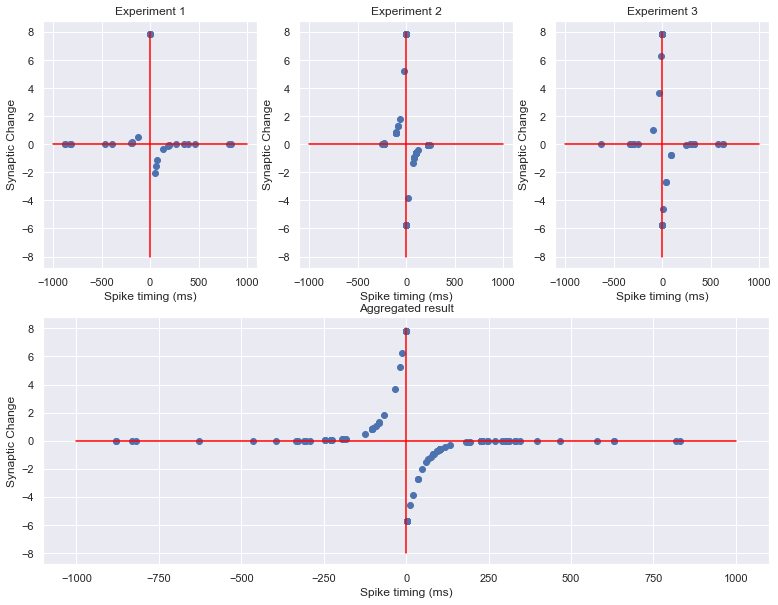

In [13]:
plt.figure(figsize=(13, 10))


plt.subplot(2, 3, 1)
plt.scatter(*zip(*delta_w_history1))
x1, y1 = [0, 0], [-8, 8]
x2, y2 = [-1000, 1000], [0, 0]
plt.plot(x1, y1, x2, y2, color="red")
plt.title("Experiment 1")
plt.gca().set_ylabel('Synaptic Change')
plt.gca().set_xlabel('Spike timing (ms)')

plt.subplot(2, 3, 2)
plt.scatter(*zip(*delta_w_history2))
x1, y1 = [0, 0], [-8, 8]
x2, y2 = [-1000, 1000], [0, 0]
plt.plot(x1, y1, x2, y2, color="red")
plt.title("Experiment 2")
plt.gca().set_ylabel('Synaptic Change')
plt.gca().set_xlabel('Spike timing (ms)')

plt.subplot(2, 3, 3)
plt.scatter(*zip(*delta_w_history3))
x1, y1 = [0, 0], [-8, 8]
x2, y2 = [-1000, 1000], [0, 0]
plt.plot(x1, y1, x2, y2, color="red")
plt.title("Experiment 3")
plt.gca().set_ylabel('Synaptic Change')
plt.gca().set_xlabel('Spike timing (ms)')

delta_w_history_aggregated = delta_w_history1 + delta_w_history2 + delta_w_history3
plt.subplot(2, 1, 2)
plt.scatter(*zip(*delta_w_history_aggregated))
x1, y1 = [0, 0], [-8, 8]
x2, y2 = [-1000, 1000], [0, 0]
plt.plot(x1, y1, x2, y2, color="red")
plt.title("Aggregated result")
plt.gca().set_ylabel('Synaptic Change')
plt.gca().set_xlabel('Spike timing (ms)')

plt.show()